### Imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
# sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
# Not italized latex
matplotlib.rcParams["mathtext.default"] = "regular"
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='png'

# Retina quality for plots
%config InlineBackend.figure_format = 'retina'

### Load data

In [36]:
df_input = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3_normalized/input_particles.parquet"
)
df_output = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3_normalized/output_particles.parquet"
)

with open(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3_normalized/observables.pkl",
    "rb",
) as f:
    dic_obs = pickle.load(f)

dic_obs["l_df_particles"][0]

,particle_id,x,px,y,py,zeta,pzeta,particle_id_norm,x_norm,px_norm,y_norm,py_norm,zeta_norm,pzeta_norm
0,0,-0.000148,-0.000002,0.000019,4.032228e-08,-0.000008,0.00027,0,6.317178e-17,4.680581e-17,9.224527e-18,2.319388e-18,-2.015891e-23,0.003934
1,1,0.000234,-0.000009,0.000505,6.086338e-06,-0.000001,0.00027,1,5.000000e-01,2.347973e-15,5.000000e-01,1.586487e-16,2.601648e-22,0.003934
2,2,0.000616,-0.000016,0.000990,1.213235e-05,0.000005,0.00027,2,1.000000e+00,4.549089e-15,1.000000e+00,4.963200e-16,5.250985e-22,0.003934
3,3,0.000999,-0.000022,0.001476,1.817837e-05,0.000012,0.00027,3,1.500000e+00,8.851272e-15,1.500000e+00,2.899653e-16,7.966496e-22,0.003934
4,4,0.001381,-0.000029,0.001961,2.422439e-05,0.000019,0.00027,4,2.000000e+00,9.651678e-15,2.000000e+00,4.087755e-16,1.068204e-21,0.003934
5,5,0.001764,-0.000036,0.002447,3.027040e-05,0.000025,0.00027,5,2.500000e+00,1.275325e-14,2.500000e+00,1.327992e-15,1.525024e-21,0.003934
6,6,0.002146,-0.000043,0.002933,3.631642e-05,0.000032,0.00027,6,3.000000e+00,1.820882e-14,3.000000e+00,7.823517e-16,2.034832e-21,0.003934
7,7,0.002528,-0.000050,0.003418,4.236243e-05,0.000038,0.00027,7,3.500000e+00,1.805594e-14,3.500000e+00,9.090293e-16,2.544631e-21,0.003934
8,8,0.002911,-0.000057,0.003904,4.840845e-05,0.000045,0.00027,8,4.000000e+00,1.985685e-14,4.000000e+00,1.027840e-15,2.630916e-21,0.003934
9,9,0.003293,-0.000064,0.004389,5.445447e-05,0.000051,0.00027,9,4.500000e+00,2.095741e-14,4.500000e+00,2.603639e-15,2.611238e-21,0.003934


### Plot initial distribution

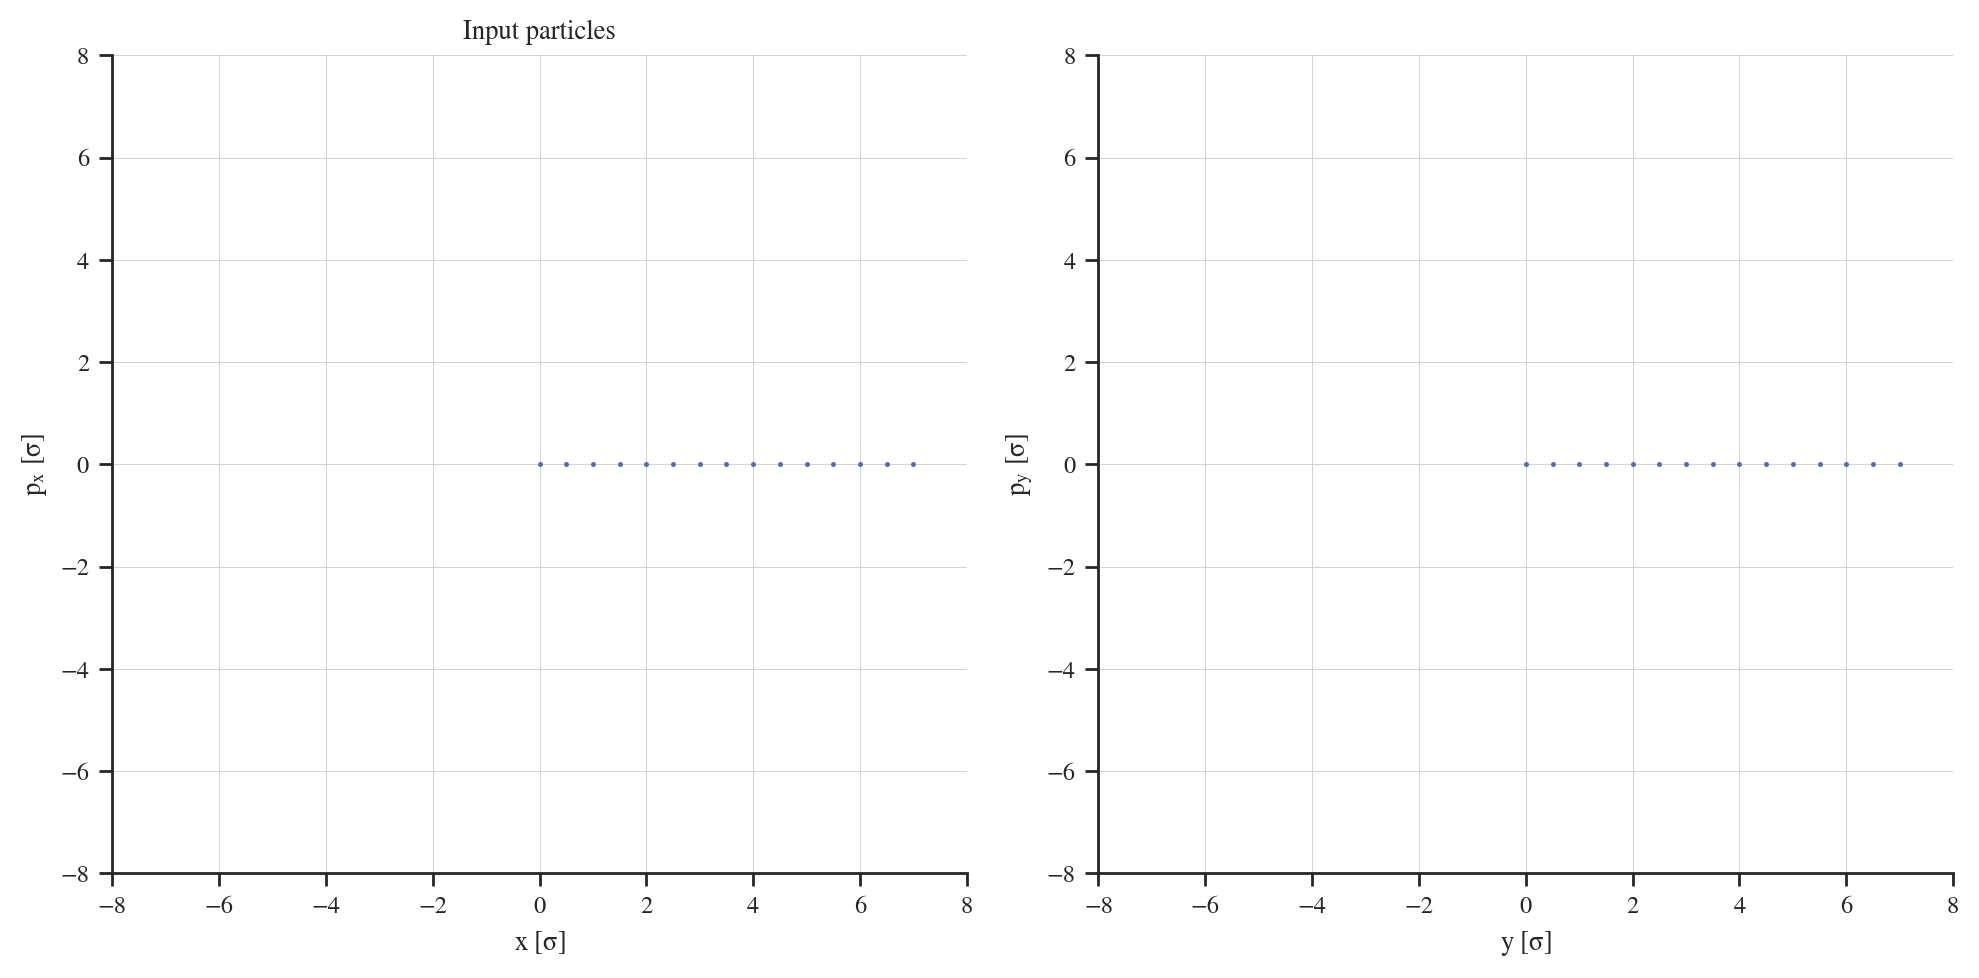

In [37]:
df_input_with_norm = dic_obs["l_df_particles"][0]

x_input = df_input_with_norm["x_norm"]
y_input = df_input_with_norm["y_norm"]
px_input = df_input_with_norm["px_norm"]
py_input = df_input_with_norm["py_norm"]

# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1)
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].set_title("Input particles")
ax[0].grid()
ax[0].set_ylim(-8, 8)
ax[0].set_xlim(-8, 8)
ax[1].scatter(y_input, py_input, s=1)
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()
ax[1].set_ylim(-8, 8)
ax[1].set_xlim(-8, 8)
plt.tight_layout()
plt.show()

### Plot evolution octupoles

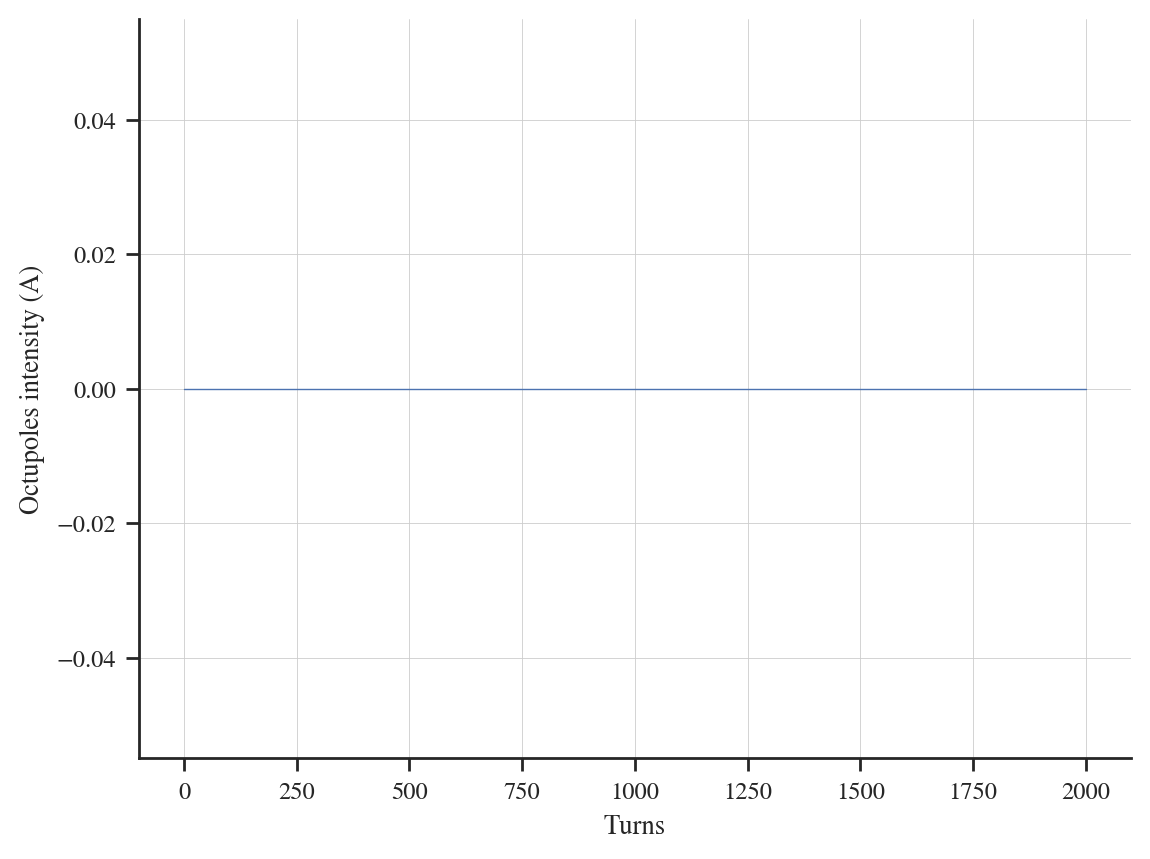

In [38]:
plt.plot(dic_obs["l_n_turns"], dic_obs["l_oct"])
plt.xlabel("Turns")
plt.ylabel("Octupoles intensity (A)")
plt.grid()
plt.show()

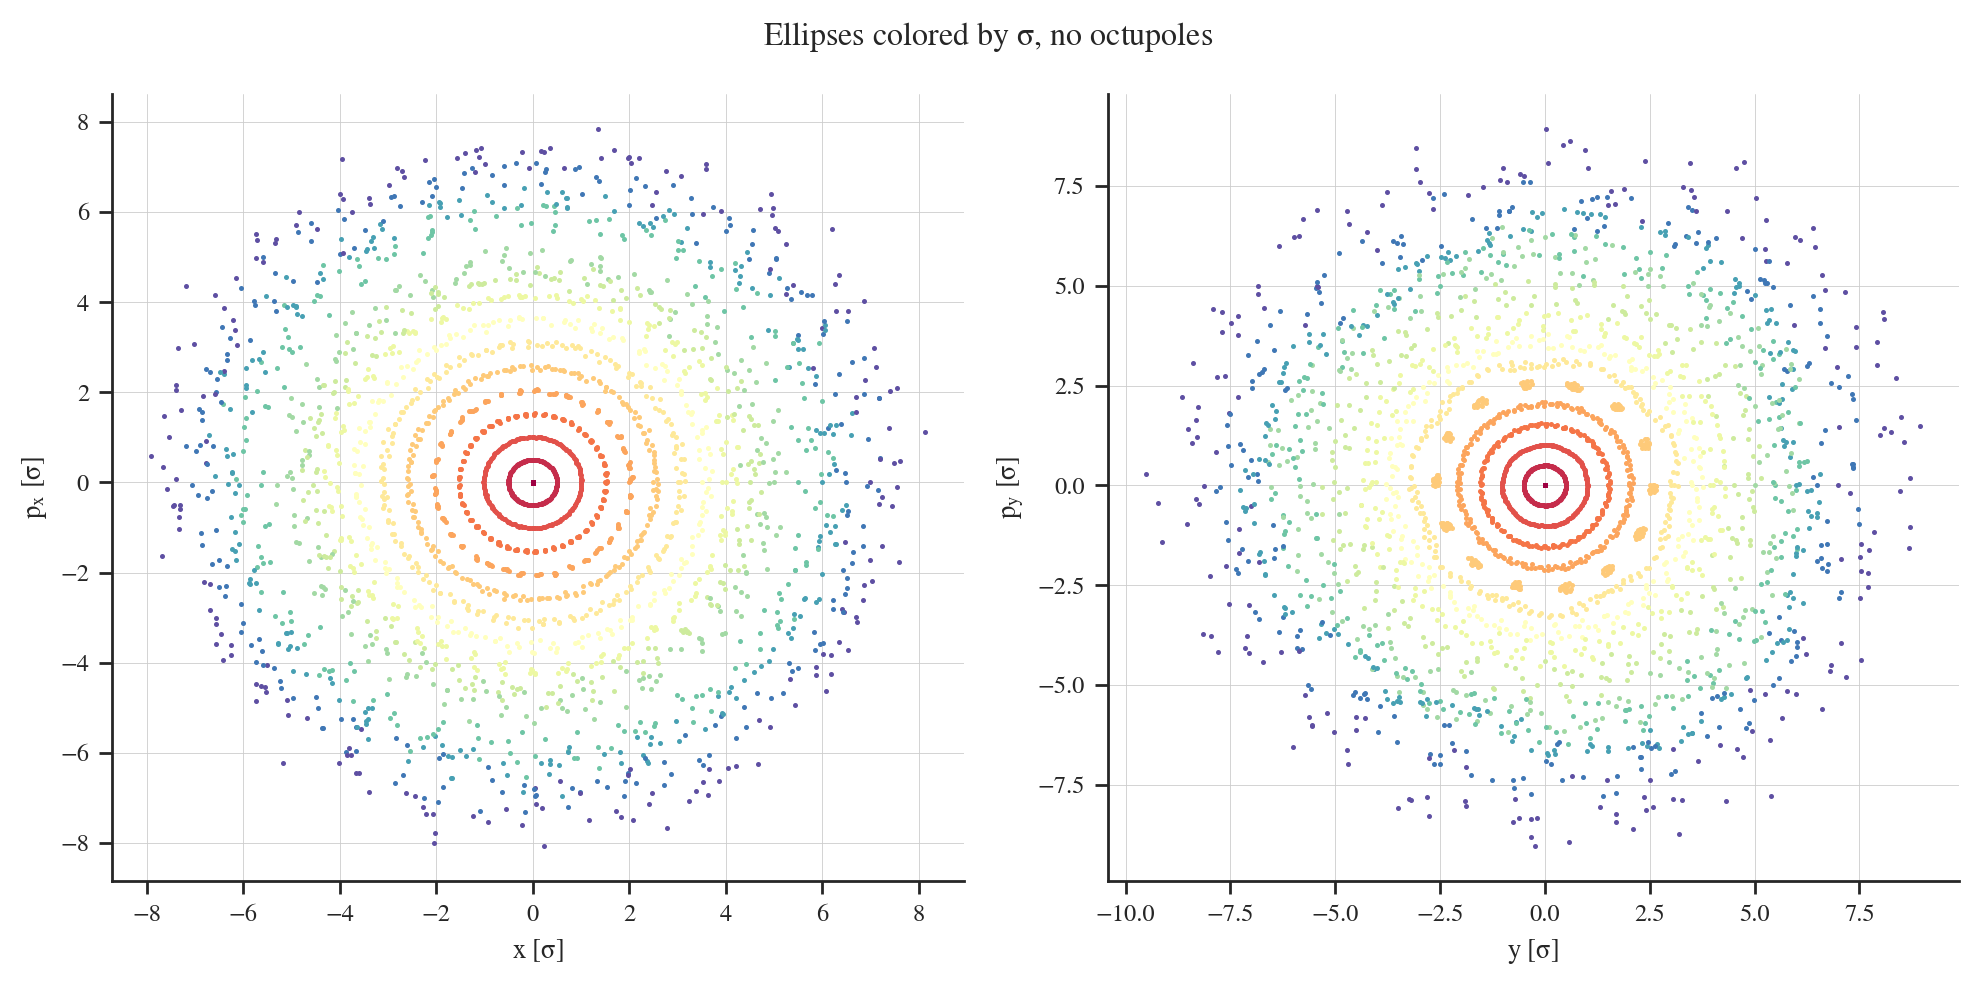

In [41]:
# Plot evolution of particles ellipses during first 50k turns (no octupoles)
cmap = matplotlib.colormaps["Spectral"]
colors = cmap(np.linspace(0, 1, len(dic_obs["l_df_particles"][0]["x_norm"])))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for n_turn, df in zip(dic_obs["l_n_turns"], dic_obs["l_df_particles"]):
    if n_turn > 50000:
        break
    for sigma in range(len(df["x_norm"])):
        ax[0].scatter(df["x_norm"][sigma], df["px_norm"][sigma], s=1, color=colors[sigma])
        ax[1].scatter(df["y_norm"][sigma], df["py_norm"][sigma], s=1, color=colors[sigma])
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].grid()
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()
plt.suptitle(r"Ellipses colored by $\sigma$, no octupoles")
plt.tight_layout()
plt.show()

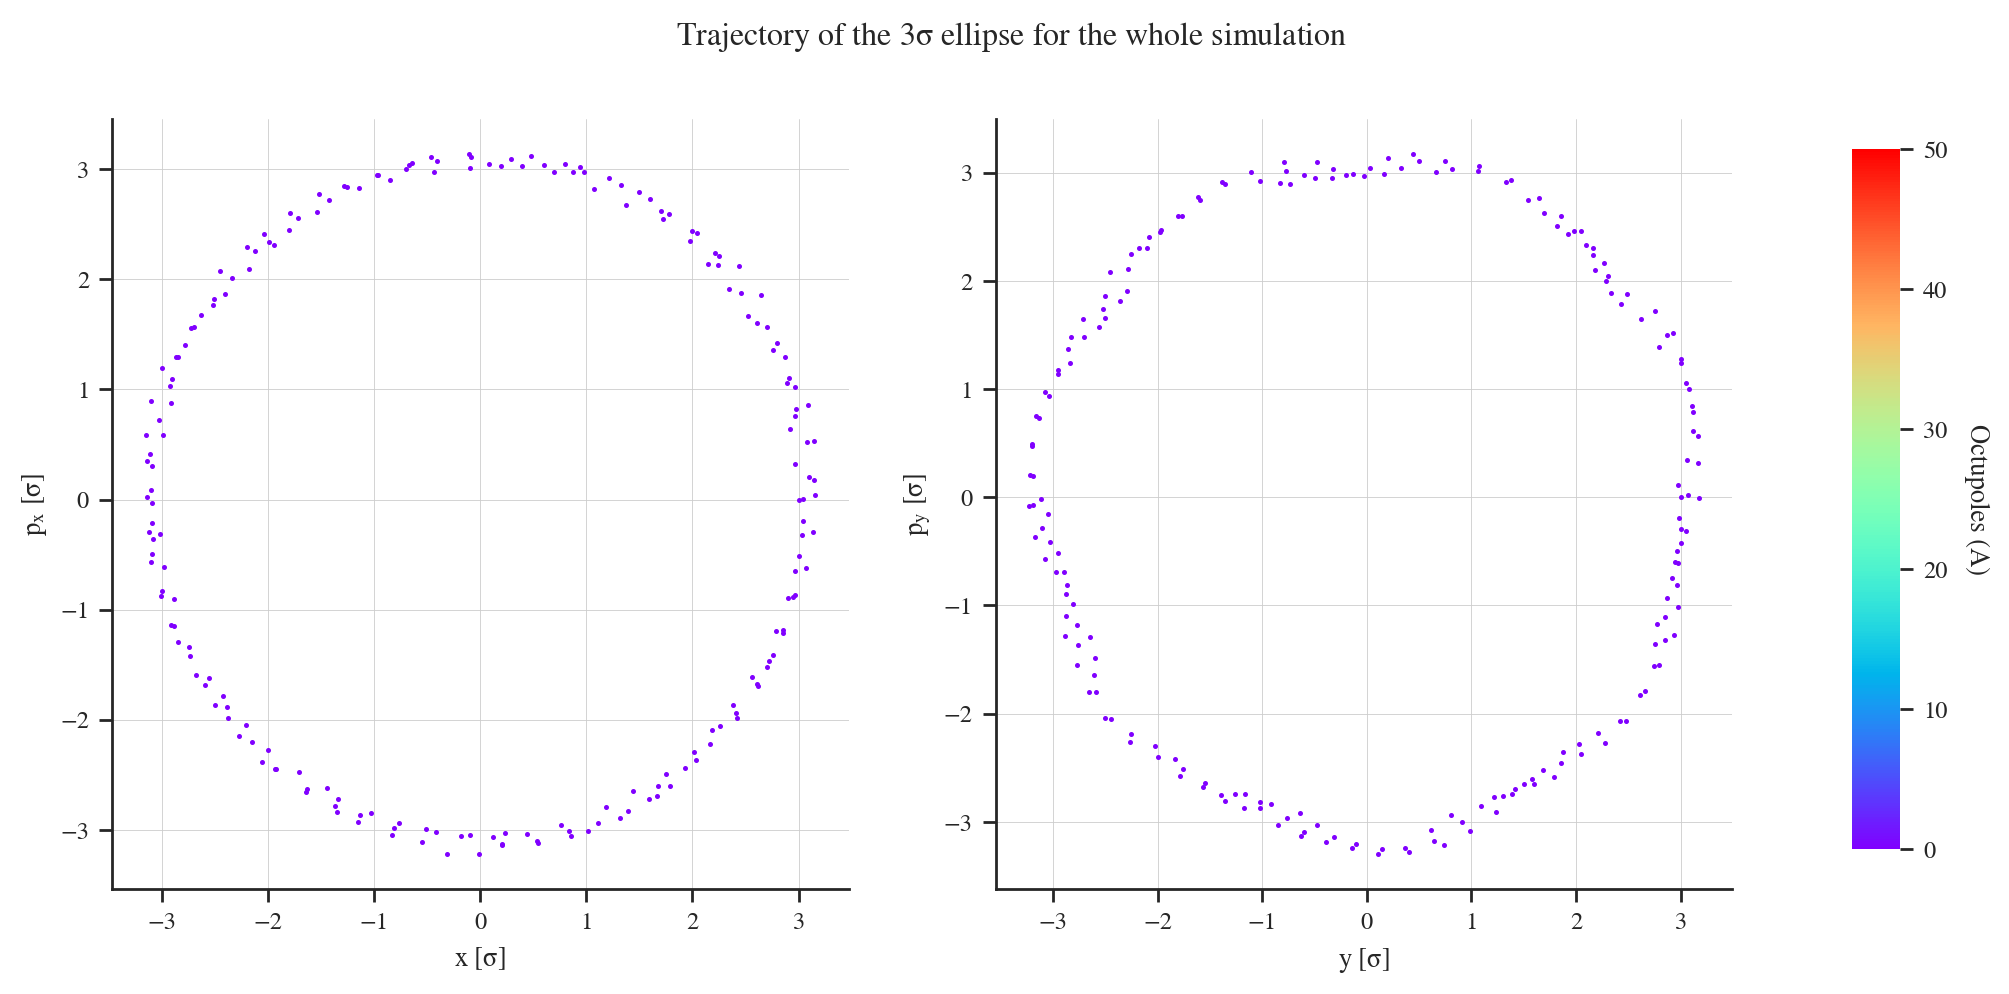

In [40]:
# Plot the trajectory of a single ellipse for the whole simulation
cmap = matplotlib.colormaps["rainbow"]
max_oct = np.max(dic_obs["l_oct"]) + 50
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for octu, df in zip(dic_obs["l_oct"], dic_obs["l_df_particles"]):
    ax[0].scatter(df["x_norm"][6], df["px_norm"][6], s=1, color=cmap(octu / max_oct))
    ax[1].scatter(df["y_norm"][6], df["py_norm"][6], s=1, color=cmap(octu / max_oct))
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].grid()
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()

# Display colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, max_oct))
sm.set_array([])
cb = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")
cb.outline.set_visible(False)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel("Octupoles (A)", rotation=270)
plt.suptitle("Trajectory of the $3\sigma$ ellipse for the whole simulation")
plt.show()